# Diminos Delivery Time – EDA

This notebook performs Univariate and Bivariate EDA following the provided instructions.

In [40]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats


In [4]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/DS Internship/diminos_data.csv")

# Basic cleaning
df.columns = df.columns.str.strip()
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [5]:

# Dataset overview
df.shape, df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


((15000, 3), None)

In [6]:

# Summary statistics (numerical)
df.describe()


,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


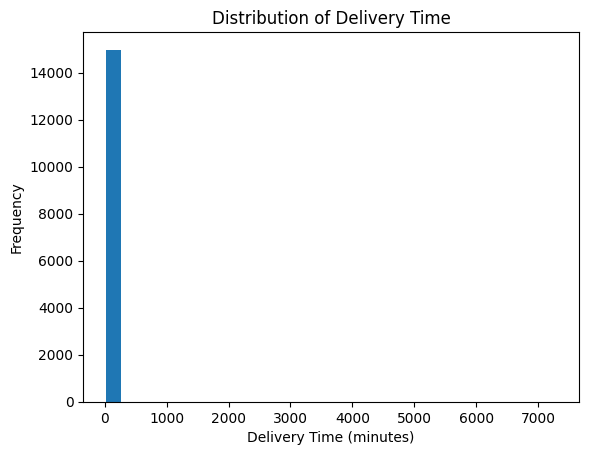

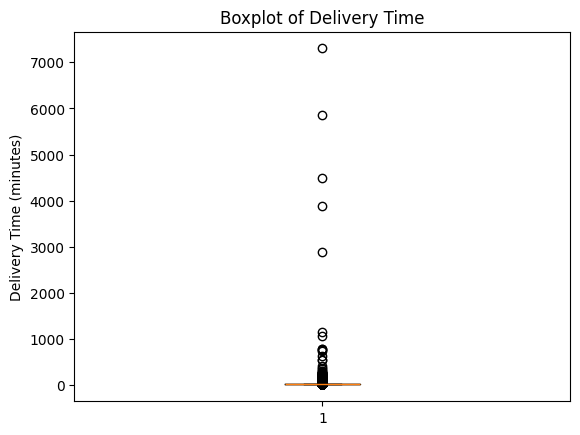

In [9]:


# Convert to datetime
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

# Calculate delivery time in minutes
df['delivery_time'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds() / 60

# Univariate Analysis - Delivery Time
plt.hist(df['delivery_time'], bins=30)
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Delivery Time")
plt.show()

plt.boxplot(df['delivery_time'])
plt.ylabel("Delivery Time (minutes)")
plt.title("Boxplot of Delivery Time")
plt.show()


In [27]:

# 95th Percentile Analysis
p95 = df['delivery_time'].quantile(0.95)
p95


np.float64(27.261043996666658)


## Key Business Insight
- With a 95th percentile delivery time of **27.26 minutes**, the store comfortably meets Diminos’ **31-minute SLA**, indicating strong operational performance and low franchise risk at present.

- The store has a buffer of ~3.7 minutes (31 − 27.26) before breaching the SLA.

- This buffer provides operational safety against: Peak-hour demand, Traffic fluctuations, Staff shortages.

- While current performance is strong, any increase in delivery delays (festive rush, weather, staffing issues) could erode this buffer.

- Therefore, monitoring the tail deliveries (slowest 5%) is critical to maintain compliance.

- However, the data(delivery time) contains very high extreme values which are outliers as shown in box plot.

- Therefore, limiting delivery time within 100 minutes can give more better understanding of the actual 95th percentile delivery time.

**Filter (exclude extreme values > 100 minutes) and replot after limiting**

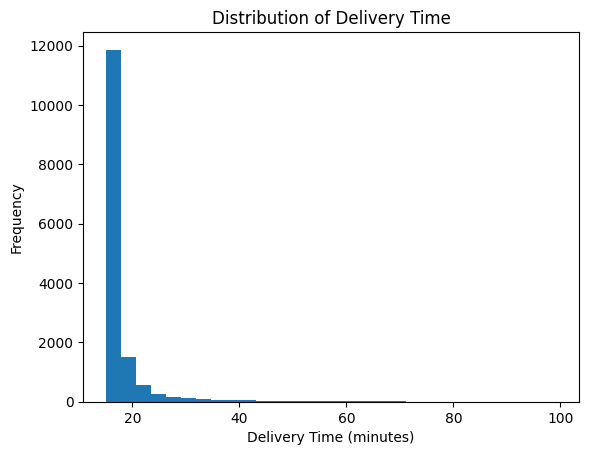

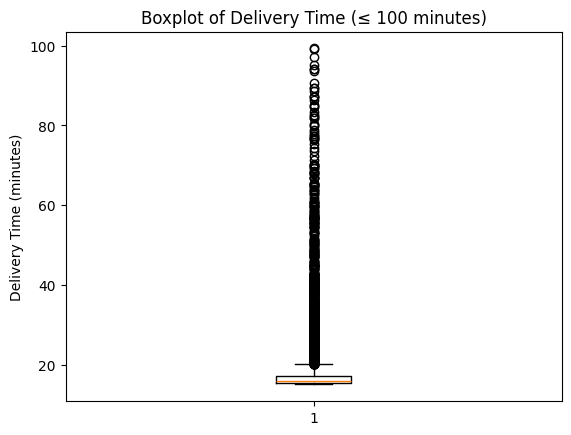

In [46]:

df_limited = df[df['delivery_time'] <= 100]

plt.hist(df_limited['delivery_time'], bins=30)
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Delivery Time")
plt.show()

plt.boxplot(df_limited['delivery_time'])
plt.ylabel("Delivery Time (minutes)")
plt.title("Boxplot of Delivery Time (≤ 100 minutes)")
plt.show()



In [28]:

# 95th Percentile Analysis
p95 = df_limited['delivery_time'].quantile(0.95)
p95


np.float64(25.993556566666665)

## Key Business Insight after limiting

After limiting, the 95th percentile delivery time reduces to ~25.99 minutes.

This is well below the 31-minute SLA, giving a buffer of ~5 minutes.

SLA compliance is therefore robust and not impacted on anomalous data points.